# Van's RV Mean and Median Flight Hours

https://www.kitplanes.com/homebuilt-accidents-focus-on-vans/?fbclid=IwAR16rMvKRhAimdUmXEr3VduVHuHiNZc0G08vp0zmC9sv46oHW1a6PhQ4E8Q

## Imports

In [18]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

plt.style.use('seaborn')

## Load aircraft data

In [3]:
all_df = pd.read_csv('../data/aircraft.csv')
exp_df = all_df.dropna(subset=['acft_model'])  # [['']]

## Load pilot data

In [4]:
pilot_df = pd.read_csv('../data/flight_time.csv')
pilot_df = pilot_df[pilot_df['flight_type'].str.lower().str.strip().str.contains(pat='totl')]
pilot_df = pilot_df[pilot_df['flight_craft'].str.lower().str.strip().str.contains(pat='all')]
pilot_df = pilot_df[pilot_df['crew_no'] == 1]
pilot_df = pilot_df[['ev_id', 'flight_hours']]

## Join the RV and pilot dataframes

In [5]:
vans_df = exp_df[exp_df['acft_model'].str.lower().str.strip().str.contains(pat='rv')]
vans_df = vans_df.merge(pilot_df, on='ev_id')[['acft_model', 'flight_hours', 'ev_id']]

## Find the incidents per model

In [6]:
rv3 = vans_df[vans_df['acft_model'].str.contains(pat='3')]
rv4 = vans_df[vans_df['acft_model'].str.contains(pat='4')]
rv6 = vans_df[vans_df['acft_model'].str.contains(pat='6')]
rv7 = vans_df[vans_df['acft_model'].str.contains(pat='7')]
rv8 = vans_df[vans_df['acft_model'].str.contains(pat='8')]
rv9 = vans_df[vans_df['acft_model'].str.contains(pat='9')]
rv10 = vans_df[vans_df['acft_model'].str.contains(pat='10')]
rv12 = vans_df[vans_df['acft_model'].str.contains(pat='12')]

## Plot the median flight hours per model

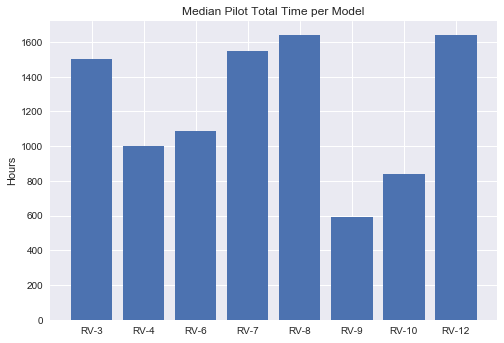

In [7]:
med3 = rv3['flight_hours'].median()
med4 = rv4['flight_hours'].median()
med6 = rv6['flight_hours'].median()
med7 = rv7['flight_hours'].median()
med8 = rv8['flight_hours'].median()
med9 = rv9['flight_hours'].median()
med10 = rv10['flight_hours'].median()
med12 =rv12['flight_hours'].median()
names = ['RV-3', 'RV-4', 'RV-6', 'RV-7', 'RV-8', 'RV-9', 'RV-10', 'RV-12']
meds = [med3, med4, med6, med7, med8, med9, med10, med12]
plt.bar(names, meds)
plt.title('Median Pilot Total Time per Model')
plt.ylabel('Hours')
plt.show()

## Plot the mean flight hours per model

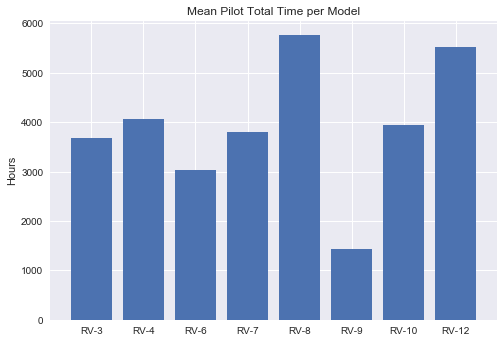

In [8]:
names = ['RV-3', 'RV-4', 'RV-6', 'RV-7', 'RV-8', 'RV-9', 'RV-10', 'RV-12']
avg3 = rv3['flight_hours'].mean()
avg4 = rv4['flight_hours'].mean()
avg6 = rv6['flight_hours'].mean()
avg7 = rv7['flight_hours'].mean()
avg8 = rv8['flight_hours'].mean()
avg9 = rv9['flight_hours'].mean()
avg10 = rv10['flight_hours'].mean()
avg12 = rv12['flight_hours'].mean()
avgs = [avg3, avg4, avg6, avg7, avg8, avg9, avg10, avg12]
plt.bar(names, avgs)
plt.title('Mean Pilot Total Time per Model')
plt.ylabel('Hours')
plt.show()